# Data preparation

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import scipy.stats
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
print("Current working directory:", os.getcwd())
base_dir = '.' 

dataframes = {}

files = ['Part1_Results.csv', 'Part2_Results.csv', 'Part3_Results.csv']

for file in files:
    file_path = os.path.join(base_dir, file)
    if os.path.exists(file_path):
        # Extract name without extension for dictionary key
        name = file.replace('.csv', '')
        dataframes[name] = pd.read_csv(file_path, sep=';', index_col=0)
        print(f"Loaded {name}: {dataframes[name].shape}")
    else:
        print(f"Warning: {file} not found!")

# To access the individual data we have to use
# dataframes['Part1_Results']
# dataframes['Part2_Results']

Current working directory: /Users/leilapaolini/Documents/GitHub/Neuroscience-
Loaded Part1_Results: (232, 9)
Loaded Part2_Results: (232, 16)
Loaded Part3_Results: (134, 16)


In [11]:
dataframes['Part1_Results'].head()

,cell_id,cell_type,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,fft_low,fft_high
0,AP032_1,PV,29.116667,-44.055420,0.390398,-55.179827,4.857357,0.640830,0.094975
1,AP032_2,PV,18.750000,-40.905100,0.532933,-49.469576,5.034024,0.654376,0.104321
2,AP035_1,PV,20.500000,-44.699736,0.513374,-55.808342,6.227139,0.842114,0.106274
3,AP035_2,PV,33.460000,-42.586909,0.423192,-51.302675,6.347127,0.867482,0.089732
4,AP039_1,SST,0.400000,-42.144056,0.637500,-58.333904,2.841876,0.338280,0.028239


In [13]:
corr_matrix = dataframes['Part1_Results'].drop(columns=["cell_id", "cell_type"]).corr()
print(corr_matrix)

              firing_rate  ap_threshold  ap_duration   mean_vm    std_vm  \
firing_rate      1.000000     -0.013379    -0.343308  0.366632  0.334048   
ap_threshold    -0.013379      1.000000     0.202195  0.417078  0.276236   
ap_duration     -0.343308      0.202195     1.000000 -0.101103  0.030159   
mean_vm          0.366632      0.417078    -0.101103  1.000000 -0.134895   
std_vm           0.334048      0.276236     0.030159 -0.134895  1.000000   
fft_low          0.312930      0.192024     0.039750 -0.187588  0.953299   
fft_high         0.475463      0.009536    -0.480181  0.103749  0.459488   

               fft_low  fft_high  
firing_rate   0.312930  0.475463  
ap_threshold  0.192024  0.009536  
ap_duration   0.039750 -0.480181  
mean_vm      -0.187588  0.103749  
std_vm        0.953299  0.459488  
fft_low       1.000000  0.404850  
fft_high      0.404850  1.000000  


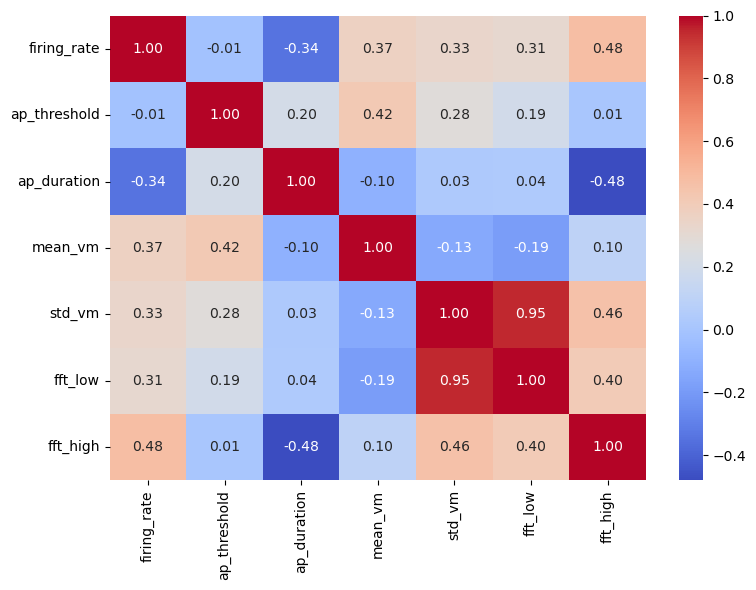

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.tight_layout()
plt.show()


In [3]:
print(dataframes['Part1_Results'].info())
print(dataframes['Part2_Results'].info())
print(dataframes['Part3_Results'].info())

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cell_id       232 non-null    object 
 1   cell_type     232 non-null    object 
 2   firing_rate   232 non-null    float64
 3   ap_threshold  232 non-null    float64
 4   ap_duration   230 non-null    float64
 5   mean_vm       232 non-null    float64
 6   std_vm        232 non-null    float64
 7   fft_low       232 non-null    float64
 8   fft_high      232 non-null    float64
dtypes: float64(7), object(2)
memory usage: 18.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 231
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cell_id            232 non-null    object 
 1   cell_type          232 non-null    object 
 2   numb_events        232 non-null    int64  
 3   wp_avg             232 no

In [4]:
# Check alignment of cell_id between Part1 and Part2
for i in range(len(dataframes['Part1_Results']['cell_id'])):
    if dataframes['Part1_Results']['cell_id'].iloc[i] != dataframes['Part2_Results']['cell_id'].iloc[i]:
        print("Mismatch between part 1 and 2 in cell_id at index", i)

In [5]:
# Check alignment of cell_id between Part1 and Part3
for i in range(len(dataframes['Part3_Results']['cell_id'])):
    if dataframes['Part1_Results']['cell_id'].iloc[i] != dataframes['Part3_Results']['cell_id'].iloc[i]:
        print("Mismatch between part 1 and 3 in cell_id at index", i)

Mismatch between part 1 and 3 in cell_id at index 0
Mismatch between part 1 and 3 in cell_id at index 1
Mismatch between part 1 and 3 in cell_id at index 2
Mismatch between part 1 and 3 in cell_id at index 3
Mismatch between part 1 and 3 in cell_id at index 4
Mismatch between part 1 and 3 in cell_id at index 5
Mismatch between part 1 and 3 in cell_id at index 6
Mismatch between part 1 and 3 in cell_id at index 7
Mismatch between part 1 and 3 in cell_id at index 8
Mismatch between part 1 and 3 in cell_id at index 9
Mismatch between part 1 and 3 in cell_id at index 10
Mismatch between part 1 and 3 in cell_id at index 11
Mismatch between part 1 and 3 in cell_id at index 12
Mismatch between part 1 and 3 in cell_id at index 13
Mismatch between part 1 and 3 in cell_id at index 14
Mismatch between part 1 and 3 in cell_id at index 15
Mismatch between part 1 and 3 in cell_id at index 16
Mismatch between part 1 and 3 in cell_id at index 17
Mismatch between part 1 and 3 in cell_id at index 18
Mis

In [6]:
y = dataframes['Part1_Results'][['cell_type']].copy()

y.head()

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

# See the mapping
print("Label mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {label} -> {i}")

print(f"\nEncoded y shape: {y_encoded.shape}")

Label mapping:
  EXC -> 0
  PV -> 1
  SST -> 2
  VIP -> 3

Encoded y shape: (232,)


/opt/anaconda3/envs/bio482/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# We check if there is class imbalance 
value_counts = dataframes['Part1_Results']['cell_type'].value_counts()
percentages = dataframes['Part1_Results']['cell_type'].value_counts(normalize=True) * 100

print("Cell Type Distribution")

for cell_type in value_counts.index:
    count = value_counts[cell_type]
    pct = percentages[cell_type]
    print(f"{cell_type:<10} {count:<10} {pct:.2f}%")


print(f"Total cells: {len(dataframes['Part1_Results'])}")

Cell Type Distribution
EXC        86         37.07%
SST        72         31.03%
PV         49         21.12%
VIP        25         10.78%
Total cells: 232


## Data splitting

In [8]:
# We start by training on Part 1 features 
X_1 = dataframes['Part1_Results'].copy()
X_1.drop(columns=['cell_id', 'cell_type'], inplace=True)

print(f"X_1 shape: {X_1.shape}")

X_1 shape: (232, 7)


In [19]:
y_encoded = pd.Series(y_encoded, name="y_encoded", index=X_1.index)
corr_to_y = X_1.corrwith(y_encoded).sort_values(ascending=False)

print(corr_to_y)


mean_vm         0.488637
firing_rate     0.158000
fft_high       -0.027921
ap_threshold   -0.117964
std_vm         -0.223400
fft_low        -0.284172
ap_duration    -0.327143
dtype: float64


In [9]:
X_train1, X_test1, y_train, y_test = train_test_split(
    X_1, y_encoded, 
    test_size=0.2, 
    stratify=y_encoded,  #ensures percentages of cell types are preserved
    random_state=42  
)

In [10]:
print(f"Training set size: {len(X_train1)}")
print(f"Test set size: {len(X_test1)}")

Training set size: 185
Test set size: 47
